In [1]:
import torch

In [2]:
print(torch.__version__)

1.12.1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [4]:
df1 = pd.read_csv("/mnt/d/sources/data/DL-PTV/11p4-1/11p40003.csv", sep=";")

In [5]:
df1.describe()

,x [mm],y [mm],z [mm],Velocity x [m/s],Velocity y [m/s],Velocity z [m/s]
count,101376.000000,101376.000000,101376.000000,101376.000000,101376.000000,101376.000000
mean,-0.270363,1.702129,0.619084,0.075395,-0.007235,0.001523
std,73.193454,50.313644,20.556376,0.106913,0.070685,0.030313
min,-125.078910,-83.484657,-33.059413,-1.161383,-0.921530,-0.449663
25%,-62.674636,-40.891264,-17.210708,-0.010436,-0.024253,-0.004557
50%,-0.270363,1.702129,0.619084,0.101996,-0.005389,0.002203
75%,62.133910,44.295522,18.448877,0.167844,0.010019,0.008720
max,124.538184,86.888915,34.297581,0.797156,1.234202,0.378791


In [6]:
df = pd.read_csv("/mnt/d/sources/data/DL-PTV/3p6-1/3p60003.csv", sep=";", index_col=False)
df.columns= ["x","y","z","vx","vy","vz"]


In [7]:
df = pd.merge(df.iloc[:50689,:], df.iloc[50690:,:], how="inner", on=["x", "y", "z"])
df.columns=["x","y","z","vx","vy","vz","px","py","pz"]

In [74]:
df['time'] = int(df[-8:][:4])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'DataFrame'

In [8]:
df.shape

(50686, 9)

In [9]:
result = df.copy()

In [10]:
result.head()

,x,y,z,vx,vy,vz,px,py,pz
0,-117.154557,86.888915,-33.059413,0.046256,0.002412,0.004036,-0.000961,-0.000533,-0.001646
1,-113.192381,86.888915,-33.059413,0.046207,0.002695,0.003250,-0.000801,-0.000702,-0.001591
2,-109.230205,86.888915,-33.059413,0.046233,0.002971,0.002535,-0.000661,-0.000779,-0.001580
3,-105.268029,86.888915,-33.059413,0.046312,0.003224,0.001953,-0.000567,-0.000779,-0.001600
4,-101.305853,86.888915,-33.059413,0.046416,0.003435,0.001540,-0.000515,-0.000747,-0.001658


In [91]:
result.describe()

,x,y,z,vx,vy,vz,px,py,pz
count,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000
mean,-0.265516,1.698768,0.620413,0.042855,0.000251,0.001598,0.001064,0.000253,0.000241
std,73.191192,50.312040,20.555794,0.010381,0.007190,0.004786,0.007553,0.006678,0.004399
min,-125.078910,-83.484657,-33.059413,-0.016828,-0.035190,-0.026883,-0.069213,-0.045150,-0.033547
25%,-61.684092,-42.872352,-17.210708,0.038333,-0.004012,-0.000190,-0.000433,-0.002041,-0.001421
50%,1.710725,-0.278959,2.600172,0.047056,0.001073,0.002058,0.001178,0.000197,0.000056
75%,64.114999,43.304978,18.448877,0.049076,0.004268,0.004145,0.002983,0.002318,0.002365
max,124.538184,86.888915,34.297581,0.069811,0.032244,0.020609,0.046152,0.058663,0.039040


#### Converting kPa to Pa for presurre columns

In [11]:
result["px"]=result["px"]*1000
result["py"]=result["py"]*1000
result["pz"]=result["pz"]*1000

### Scaling up the velocity

In [12]:
result["vx"]=result["vx"]*10
result["vy"]=result["vy"]*10
result["vz"]=result["vz"]*10

#### Check if rounding affect the number of unique values

In [13]:
len(result["x"].unique()), len(result["y"].unique()), len(result["z"].unique())

(64, 44, 18)

In [14]:
len(result["x"].round(decimals=0).unique()), len(result["y"].round(decimals=0).unique()), len(result["z"].round(decimals=0).unique())

(64, 44, 18)

#### Rounding decimal place

In [15]:
result["vx"] = result["vx"].round(decimals=2)
result["vy"] = result["vy"].round(decimals=2)
result["vz"] = result["vz"].round(decimals=2)
result["px"] = result["px"].round(decimals=2)
result["py"] = result["py"].round(decimals=2)
result["pz"] = result["pz"].round(decimals=2)

result["x"] = result["x"].round(decimals=0)
result["y"] = result["y"].round(decimals=0)
result["z"] = result["z"].round(decimals=0)

In [16]:
result.head()

,x,y,z,vx,vy,vz,px,py,pz
0,-117.0,87.0,-33.0,0.46,0.02,0.04,-0.96,-0.53,-1.65
1,-113.0,87.0,-33.0,0.46,0.03,0.03,-0.80,-0.70,-1.59
2,-109.0,87.0,-33.0,0.46,0.03,0.03,-0.66,-0.78,-1.58
3,-105.0,87.0,-33.0,0.46,0.03,0.02,-0.57,-0.78,-1.60
4,-101.0,87.0,-33.0,0.46,0.03,0.02,-0.52,-0.75,-1.66


In [17]:
result.describe()

,x,y,z,vx,vy,vz,px,py,pz
count,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000
mean,-0.213905,1.632995,0.667995,0.428543,0.002518,0.015998,1.064200,0.253495,0.240698
std,73.208730,50.343847,20.368326,0.103824,0.071941,0.047958,7.552764,6.678201,4.399250
min,-125.000000,-83.000000,-33.000000,-0.170000,-0.350000,-0.270000,-69.210000,-45.150000,-33.550000
25%,-62.000000,-43.000000,-17.000000,0.380000,-0.040000,0.000000,-0.430000,-2.040000,-1.420000
50%,2.000000,-0.000000,3.000000,0.470000,0.010000,0.020000,1.180000,0.200000,0.060000
75%,64.000000,43.000000,18.000000,0.490000,0.040000,0.040000,2.980000,2.320000,2.360000
max,125.000000,87.000000,34.000000,0.700000,0.320000,0.210000,46.150000,58.660000,39.040000


In [18]:
median = np.median(result["x"]), np.median(result["y"]), np.median(result["z"])

In [19]:
centroid = np.round(np.sum(result["x"])/len(result["x"]),decimals=0), np.round(np.sum(result["y"])/len(result["y"]),decimals=0), np.round(np.sum(result["z"])/len(
    result["z"]),decimals=0)


In [20]:
median, centroid

((2.0, 0.0, 3.0), (-0.0, 2.0, 1.0))

#### Function for calculating relative distance of each point to centroid

In [21]:
def distance(x, y, z):
    return np.sqrt(x**2.0 + y**2.0 + z**2.0)

In [22]:
result["distance"] = distance(result["x"], result["y"], result["z"])

In [23]:
result.head()

,x,y,z,vx,vy,vz,px,py,pz,distance
0,-117.0,87.0,-33.0,0.46,0.02,0.04,-0.96,-0.53,-1.65,149.489130
1,-113.0,87.0,-33.0,0.46,0.03,0.03,-0.80,-0.70,-1.59,146.379643
2,-109.0,87.0,-33.0,0.46,0.03,0.03,-0.66,-0.78,-1.58,143.314340
3,-105.0,87.0,-33.0,0.46,0.03,0.02,-0.57,-0.78,-1.60,140.296115
4,-101.0,87.0,-33.0,0.46,0.03,0.02,-0.52,-0.75,-1.66,137.328074


In [147]:
len(result["distance"].round(decimals=1) .unique())

1385

In [162]:
result["z"].unique()

array([-33., -29., -25., -21., -17., -13.,  -9.,  -5.,  -1.,   3.,   7.,
        11.,  14.,  18.,  22.,  26.,  30.,  34.])

In [24]:
result.describe()

,x,y,z,vx,vy,vz,px,py,pz,distance
count,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000,50686.000000
mean,-0.213905,1.632995,0.667995,0.428543,0.002518,0.015998,1.064200,0.253495,0.240698,85.702462
std,73.208730,50.343847,20.368326,0.103824,0.071941,0.047958,7.552764,6.678201,4.399250,31.096489
min,-125.000000,-83.000000,-33.000000,-0.170000,-0.350000,-0.270000,-69.210000,-45.150000,-33.550000,2.236068
25%,-62.000000,-43.000000,-17.000000,0.380000,-0.040000,0.000000,-0.430000,-2.040000,-1.420000,62.713635
50%,2.000000,-0.000000,3.000000,0.470000,0.010000,0.020000,1.180000,0.200000,0.060000,86.336551
75%,64.000000,43.000000,18.000000,0.490000,0.040000,0.040000,2.980000,2.320000,2.360000,110.249717
max,125.000000,87.000000,34.000000,0.700000,0.320000,0.210000,46.150000,58.660000,39.040000,156.044865


In [164]:
vis = result[result["z"] == -1]

In [168]:
vis["x"].to_numpy()

array([-125., -121., -117., ...,  117.,  121.,  125.])

In [165]:
vis.head()

,x,y,z,vx,vy,vz,px,py,pz,distance
22526,-125.0,87.0,-1.0,0.48,0.03,0.07,-0.33,-0.10,-4.26,152.0
22527,-121.0,87.0,-1.0,0.48,0.04,0.06,-0.02,-0.41,-4.01,149.0
22528,-117.0,87.0,-1.0,0.48,0.04,0.06,0.29,-0.58,-3.78,146.0
22529,-113.0,87.0,-1.0,0.48,0.04,0.05,0.53,-0.63,-3.54,143.0
22530,-109.0,87.0,-1.0,0.49,0.04,0.04,0.67,-0.60,-3.26,139.0


In [185]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [197]:
import plotly.graph_objects as go

feature_x = vis["x"].to_numpy()
feature_y = vis["y"].to_numpy()

# Creating 2-D grid of features
[X, Y] = np.meshgrid(feature_x, feature_y)

Z = vis["vx"].to_numpy()

fig = go.Figure(data =go.Contour(x = feature_x, y = feature_y, z = Z, colorscale='thermal'))

fig.update_layout(
    title="Velocity contour",
    autosize=False,
    width=1100,
    height=800,)

fig.show()

### Data Distribution

In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

(array([5.6000e+01, 2.4600e+02, 5.8900e+02, 1.5350e+03, 2.9950e+03,
        1.6156e+04, 2.3818e+04, 4.6710e+03, 6.0100e+02, 1.9000e+01]),
 array([-0.27 , -0.222, -0.174, -0.126, -0.078, -0.03 ,  0.018,  0.066,
         0.114,  0.162,  0.21 ]),
 <BarContainer object of 10 artists>)

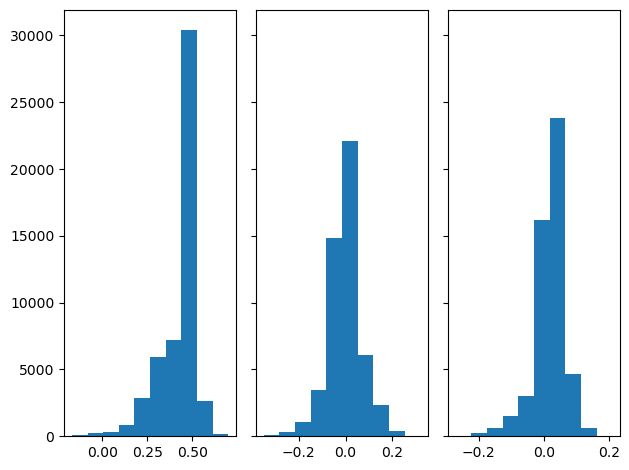

In [25]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(result["vx"])
axs[1].hist(result["vy"])
axs[2].hist(result["vz"])

ValueError: supplied range of [-inf, -0.35667494393873245] is not finite

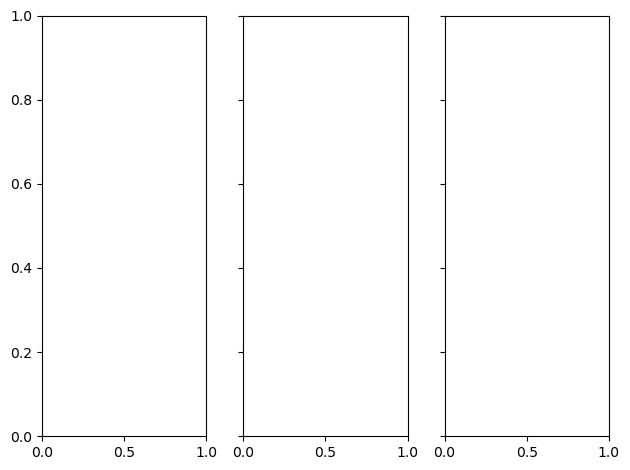

In [29]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(np.log(xt))
# axs[1].hist(np.log(result["vy"]))
# axs[2].hist(np.log(result["vz"]))

In [30]:
np.log(result["vx"][result["vx"]<0])

4301    NaN
4302    NaN
4366    NaN
7117    NaN
7118    NaN
         ..
46610   NaN
46671   NaN
46672   NaN
46673   NaN
46674   NaN
Name: vx, Length: 276, dtype: float64

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [39]:
xt = scaler.fit_transform(result["vx"].to_numpy().reshape(-1,1))

In [40]:
xt

array([[0.30298375],
       [0.30298375],
       [0.30298375],
       ...,
       [0.4956185 ],
       [0.4956185 ],
       [0.39930113]])

(array([   95.,   212.,   346.,   818.,  2852.,  5898.,  7242., 30381.,
         2635.,   207.]),
 array([-5.76501075, -4.9270496 , -4.08908846, -3.25112731, -2.41316617,
        -1.57520502, -0.73724387,  0.10071727,  0.93867842,  1.77663956,
         2.61460071]),
 <BarContainer object of 10 artists>)

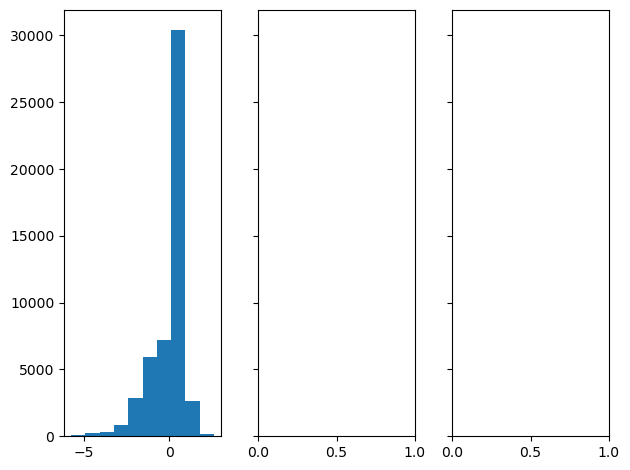

In [41]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(xt)